In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [33]:
df = pd.read_csv('data.csv')
df.count

<bound method DataFrame.count of       id  ...                                               data
0      1  ...  {"event": "action", "timestamp": 1618616140.48...
1      2  ...  {"event": "session_started", "timestamp": 1618...
2      3  ...  {"event": "action", "timestamp": 1618616140.48...
3      4  ...  {"event": "user", "timestamp": 1618616140.8380...
4      5  ...  {"event": "user_featurization", "timestamp": 1...
..   ...  ...                                                ...
601  602  ...  {"event": "slot", "timestamp": 1618763138.8643...
602  603  ...  {"event": "active_loop", "timestamp": 16187631...
603  604  ...  {"event": "action", "timestamp": 1618763138.87...
604  605  ...  {"event": "bot", "timestamp": 1618763138.87259...
605  606  ...  {"event": "action", "timestamp": 1618763138.88...

[606 rows x 7 columns]>

In [34]:
#Converte os dados na coluna 'data' (em json) para colunas no dataframe
df = pd.concat([df, pd.io.json.json_normalize(df.data.apply(json.loads))], axis=1)
df.count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


<bound method DataFrame.count of       id                             sender_id  ... data.custom  value
0      1  5ef090cb-cf75-425f-a23c-baa8769811b2  ...         NaN    NaN
1      2  5ef090cb-cf75-425f-a23c-baa8769811b2  ...         NaN    NaN
2      3  5ef090cb-cf75-425f-a23c-baa8769811b2  ...         NaN    NaN
3      4  5ef090cb-cf75-425f-a23c-baa8769811b2  ...         NaN    NaN
4      5  5ef090cb-cf75-425f-a23c-baa8769811b2  ...         NaN    NaN
..   ...                                   ...  ...         ...    ...
601  602  cc213fa7-ecbf-4f0e-8fb3-58c2206a934a  ...         NaN   None
602  603  cc213fa7-ecbf-4f0e-8fb3-58c2206a934a  ...         NaN    NaN
603  604  cc213fa7-ecbf-4f0e-8fb3-58c2206a934a  ...         NaN    NaN
604  605  cc213fa7-ecbf-4f0e-8fb3-58c2206a934a  ...         NaN    NaN
605  606  cc213fa7-ecbf-4f0e-8fb3-58c2206a934a  ...         NaN    NaN

[606 rows x 41 columns]>

In [35]:
df.head()

,id,sender_id,type_name,timestamp,intent_name,action_name,data,event,timestamp,name,policy,confidence,action_text,text,input_channel,message_id,parse_data.intent.id,parse_data.intent.name,parse_data.intent.confidence,parse_data.entities,parse_data.text,parse_data.message_id,parse_data.intent_ranking,parse_data.response_selector.all_retrieval_intents,parse_data.response_selector.default.response.id,parse_data.response_selector.default.response.responses,parse_data.response_selector.default.response.response_templates,parse_data.response_selector.default.response.confidence,parse_data.response_selector.default.response.intent_response_key,parse_data.response_selector.default.response.utter_action,parse_data.response_selector.default.response.template_name,parse_data.response_selector.default.ranking,use_text_for_featurization,metadata.utter_action,data.elements,data.quick_replies,data.buttons,data.attachment,data.image,data.custom,value
0,1,5ef090cb-cf75-425f-a23c-baa8769811b2,action,1.618616e+09,NaN,action_session_start,"{""event"": ""action"", ""timestamp"": 1618616140.48...",action,1.618616e+09,action_session_start,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5ef090cb-cf75-425f-a23c-baa8769811b2,session_started,1.618616e+09,NaN,NaN,"{""event"": ""session_started"", ""timestamp"": 1618...",session_started,1.618616e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5ef090cb-cf75-425f-a23c-baa8769811b2,action,1.618616e+09,NaN,action_listen,"{""event"": ""action"", ""timestamp"": 1618616140.48...",action,1.618616e+09,action_listen,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5ef090cb-cf75-425f-a23c-baa8769811b2,user,1.618616e+09,saudacao,NaN,"{""event"": ""user"", ""timestamp"": 1618616140.8380...",user,1.618616e+09,NaN,NaN,NaN,NaN,oi,rest,e6785e9a148c4f5bac2234a8c6e791e6,1.117066e+18,saudacao,0.999581,[],oi,e6785e9a148c4f5bac2234a8c6e791e6,"[{'id': 1117065996515008408, 'name': 'saudacao...",[],NaN,NaN,NaN,0.0,NaN,utter_None,utter_None,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5ef090cb-cf75-425f-a23c-baa8769811b2,user_featurization,1.618616e+09,NaN,NaN,"{""event"": ""user_featurization"", ""timestamp"": 1...",user_featurization,1.618616e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.sender_id.value_counts()

5fb7ea77-b8af-44bc-901b-6583022e8247    255
278906b1-31e5-44b8-9f0a-b292e1cc6b2d    109
31ad31408ce043d7ad6278996202bca6         80
cc213fa7-ecbf-4f0e-8fb3-58c2206a934a     74
02d6ec1b-656c-4aae-b697-4b16c54d7e94     56
5ef090cb-cf75-425f-a23c-baa8769811b2     32
Name: sender_id, dtype: int64

In [37]:
df.intent_name.value_counts()

agendar_atendimento    17
ajuda                  13
alvara_sanitario       10
confirmacao             9
consultar_iptu          8
ligar_eletricidade      7
saudacao                7
nlu_fallback            6
despedida               3
negacao                 1
Name: intent_name, dtype: int64

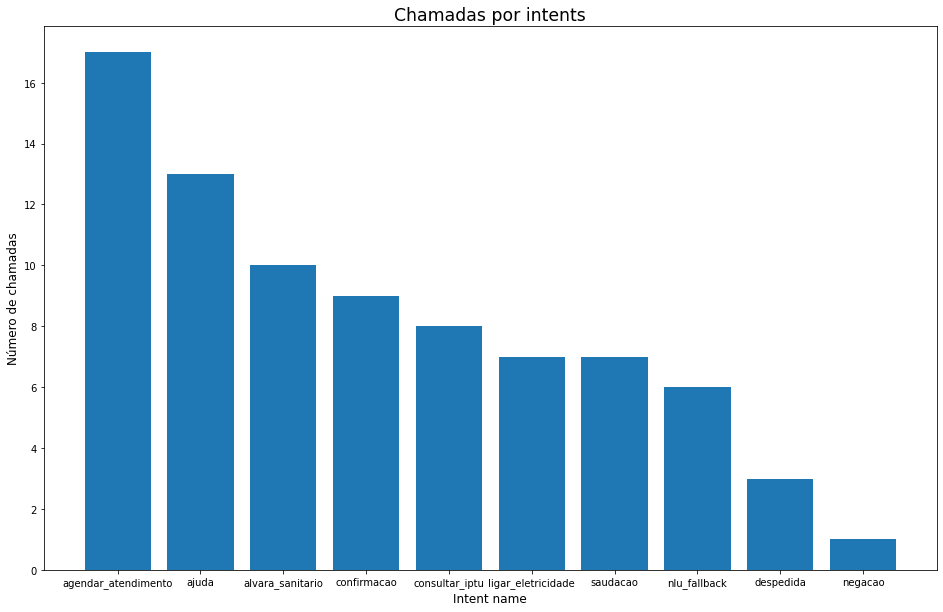

In [38]:
(fig, ax) = plt.subplots(1, 1, figsize=(16, 10))

counts = df.intent_name.value_counts()
ax.bar(counts.index, counts)
ax.set_title('Chamadas por intents', fontsize='xx-large')
ax.set_xlabel('Intent name', fontsize='large')
ax.set_ylabel('Número de chamadas',fontsize='large')
plt.show()

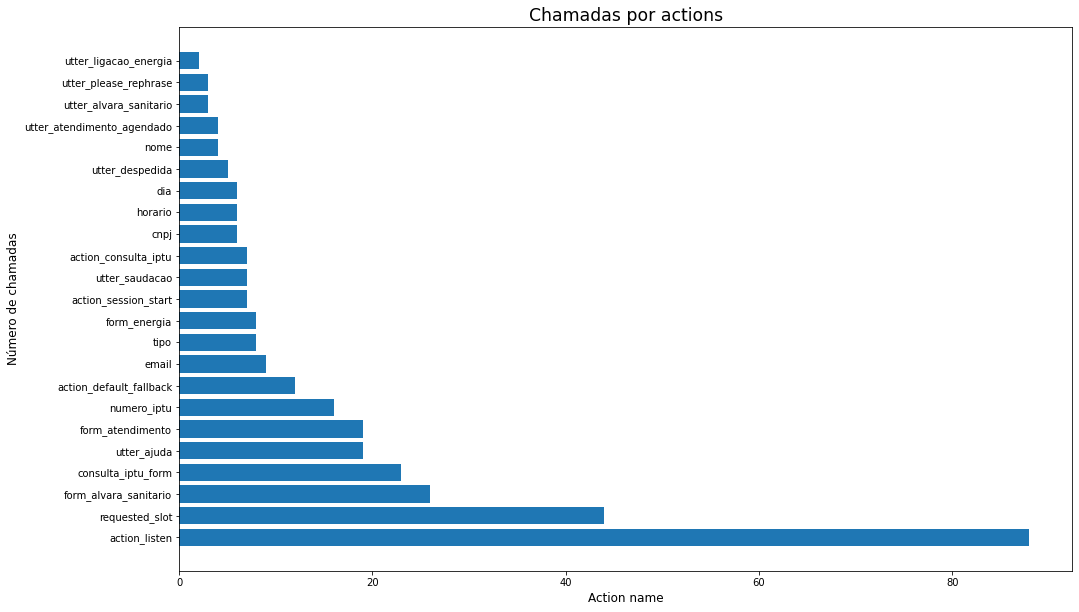

In [39]:
(fig, ax) = plt.subplots(1, 1, figsize=(16, 10))

counts = df.action_name.value_counts()
ax.barh(counts.index, counts)
ax.set_title('Chamadas por actions', fontsize='xx-large')
ax.set_xlabel('Action name', fontsize='large')
ax.set_ylabel('Número de chamadas',fontsize='large')
plt.show()

In [40]:
df.describe()

,id,timestamp,timestamp,confidence,action_text,parse_data.intent.id,parse_data.intent.confidence,parse_data.response_selector.default.response.id,parse_data.response_selector.default.response.responses,parse_data.response_selector.default.response.response_templates,parse_data.response_selector.default.response.confidence,parse_data.response_selector.default.response.intent_response_key,data.elements,data.quick_replies,data.attachment,data.image,data.custom
count,606.00000,6.060000e+02,6.060000e+02,207.000000,0.0,6.200000e+01,81.000000,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,303.50000,1.618726e+09,1.618726e+09,0.917934,NaN,-9.969229e+17,0.948977,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
std,175.08141,4.210998e+04,4.210998e+04,0.181443,NaN,4.553892e+18,0.146572,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,1.618616e+09,1.618616e+09,0.300000,NaN,-8.306835e+18,0.359421,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,152.25000,1.618687e+09,1.618687e+09,0.934246,NaN,-5.104035e+18,0.990514,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,303.50000,1.618746e+09,1.618746e+09,0.997410,NaN,-5.292040e+17,0.998779,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,454.75000,1.618763e+09,1.618763e+09,1.000000,NaN,3.102981e+18,0.999895,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
max,606.00000,1.618763e+09,1.618763e+09,1.000000,NaN,8.477700e+18,1.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
